In [2]:
import time
start=time.time()

In [1]:
import os
base_dir=('E:/Projects/Kaggle/Cat_dog_classifier')
train_dir=os.path.join(base_dir,'train')
val_dir=os.path.join(base_dir,'validation')
test_dir=os.path.join(base_dir,'test')
train_cat_dir=os.path.join(train_dir,'cats')

In [5]:
from keras.preprocessing.image import ImageDataGenerator
train_transform=ImageDataGenerator(rescale=1./255, rotation_range=40,width_shift_range=0.2,
                                  height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,
                                  fill_mode='nearest')

test_transform=ImageDataGenerator(rescale=1./255)

train_loader=train_transform.flow_from_directory(train_dir, target_size=(150,150),batch_size=64,
                                                class_mode='binary',color_mode='rgb')
#will convert into 150,150 
#apply to the img of the whole train_dir folder

validation_loader=test_transform.flow_from_directory(val_dir,target_size=(150,150),batch_size=64,
                                                class_mode='binary',color_mode='rgb')

test_loader=test_transform.flow_from_directory(test_dir,target_size=(150,150),batch_size=64,
                                                class_mode='binary',color_mode='rgb')

Using TensorFlow backend.


Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
#Build the model
from keras import layers
from keras import models
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout

model=models.Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr=1e-4),
             metrics=['acc'])

In [8]:
classifier=model.fit_generator(train_loader,
                           steps_per_epoch=63,epochs=15,
                           validation_data=validation_loader,
                            validation_steps=16)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
63/63 [==============================] - 27s 433ms/step - loss: 0.6934 - acc: 0.5062 - val_loss: 0.6896 - val_acc: 0.5140
Epoch 2/15
63/63 [==============================] - 26s 413ms/step - loss: 0.6795 - acc: 0.5518 - val_loss: 0.6516 - val_acc: 0.6220
Epoch 3/15
63/63 [==============================] - 26s 413ms/step - loss: 0.6623 - acc: 0.6019 - val_loss: 0.6148 - val_acc: 0.6730
Epoch 4/15
63/63 [==============================] - 26s 414ms/step - loss: 0.6386 - acc: 0.6262 - val_loss: 0.5883 - val_acc: 0.6950
Epoch 5/15
63/63 [==============================] - 26s 415ms/step - loss: 0.6236 - acc: 0.6493 - val_loss: 0.5705 - val_acc: 0.7000
Epoch 6/15
63/63 [==============================] - 26s 412ms/step - loss: 0.6115 - acc: 0.6604 - val_loss: 0.5635 - val_acc: 0.7160
Epoch 7/15
63/63 [==============================] - 26s 414ms/step - loss: 0.5982 - acc: 0.6771 - val_loss: 0.5913 - val_acc: 0.6670
Epoch 8/15
63/63 [===

In [9]:
model.save('cats_and_dogs_classifier_v1.h5')

end=time.time()
print('The training took {} second'.format(end-start))

The training took 395.2384674549103 second


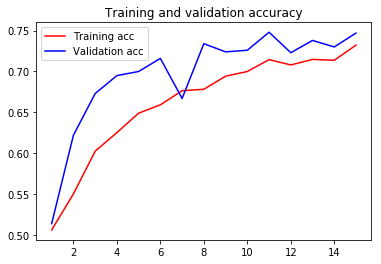

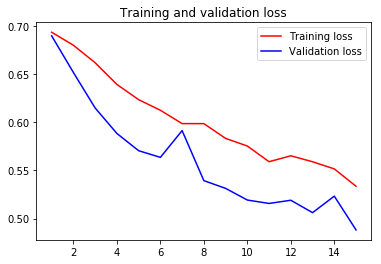

In [18]:
import matplotlib.pyplot as plt

acc=classifier.history['acc']
val_acc=classifier.history['val_acc']
loss=classifier.history['loss']
val_loss=classifier.history['val_loss']

epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'r',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [11]:
test_loss,test_acc=model.evaluate_generator(test_loader,steps=50)
print('test loss:', test_loss)
print('test acc:', test_acc)

test loss: 0.5185572064441183
test acc: 0.7362531972358294


In [12]:
from keras.preprocessing import image
img_path=('E:/Projects/Kaggle/Cat_dog_classifier/test/dogs/dog.2512.jpg')
img=image.load_img(img_path,target_size=(150,150))
#here img is just an img object

x=image.img_to_array(img)
x=x.reshape((1,)+x.shape)

In [32]:
label_map = (train_loader.class_indices)
print(label_map)

{'cats': 0, 'dogs': 1}


In [31]:
mapping={}
for i,j in label_map.items():
    mapping[j]=i
    
print(mapping)

{0: 'cats', 1: 'dogs'}


In [14]:
ypred=model.predict(x)
print('ypred is',ypred,'have shape',ypred.shape,type(ypred))

import numpy as np
ypred_scalar= np.asscalar(ypred)

print('The pet is a {}'.format(mapping[ypred_scalar]))

#OR 

scalar=ypred.item()
print('The pet is a {}'.format(mapping[scalar]))
#numpy.ndarray.item() return Copy an element of an array to a standard Python scalar and return it.

ypred is [[1.]] have shape (1, 1) <class 'numpy.ndarray'>
The pet is a dogs
The pet is a dogs
